In [1]:
import pypsa
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt 
import warnings

from sklearn.linear_model import Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [28]:
n = pypsa.Network("networks/elec_s_6_ec_lcopt_Co2L-24H.nc")

INFO:pypsa.io:Imported network elec_s_6_ec_lcopt_Co2L-24H.nc has buses, carriers, generators, global_constraints, lines, links, loads, shapes, storage_units, stores


c:\Users\csms\miniconda3\envs\bachelor-env\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


(<matplotlib.collections.PatchCollection at 0x268b46c1fd0>,
 <matplotlib.collections.LineCollection at 0x268b4604210>)

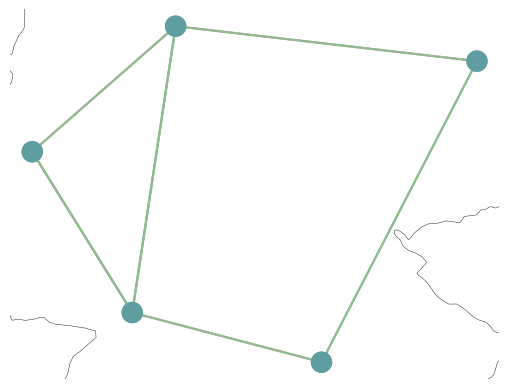

In [31]:
n.plot()

In [30]:
n.buses

,v_nom,x,y,country,control,generator,carrier,location,type,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,sub_network
Bus,,,,,,,,,,,,,,
DE0 1,380.0,7.294747,51.347116,DE,PQ,,AC,,,,1.0,0.0,inf,
DE0 2,380.0,8.619401,49.217062,DE,PQ,,AC,,,,1.0,0.0,inf,
DE0 3,380.0,9.194335,53.010318,DE,PQ,,AC,,,,1.0,0.0,inf,
DE0 4,380.0,13.185678,52.547655,DE,PQ,,AC,,,,1.0,0.0,inf,
DE0 5,380.0,11.126677,48.559542,DE,PQ,,AC,,,,1.0,0.0,inf,
DE0 1 H2,1.0,7.294747,51.347116,DE,PQ,,H2,DE0 1,,,1.0,0.0,inf,
DE0 2 H2,1.0,8.619401,49.217062,DE,PQ,,H2,DE0 2,,,1.0,0.0,inf,
DE0 3 H2,1.0,9.194335,53.010318,DE,PQ,,H2,DE0 3,,,1.0,0.0,inf,
DE0 4 H2,1.0,13.185678,52.547655,DE,PQ,,H2,DE0 4,,,1.0,0.0,inf,


In [29]:
n.mremove('Bus', ['DE0 0', 'DE0 0 H2'])